<a href="https://colab.research.google.com/github/MuhammadMaazKhan/SkilledScore/blob/main/First%20attempt/Sentiment%20Analysis%20of%20Product%20Reviews/Task_1_Sentiment_Analysis_of_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('product_reviews.csv')

In [7]:
dataset.head()

,review_id,review_text,rating,sentiment
0,1,"Excellent product, highly recommended!",4,positive
1,2,Poor quality and bad customer service.,1,negative
2,3,Very satisfied with the purchase.,4,positive
3,4,Works perfectly and great quality.,4,positive
4,5,Didn't meet my expectations at all.,1,negative


In [8]:
# Import necessary libraries for text processing
import re  # Regular expressions for text cleaning
import nltk  # Natural Language Toolkit for text preprocessing

nltk.download('stopwords')  # Download the list of common stopwords (words like "the", "is", "in", etc.)
from nltk.corpus import stopwords  # Import stopwords for filtering unnecessary words
from nltk.stem.porter import PorterStemmer  # Import Porter Stemmer for reducing words to their root forms

corpus = []  # Initialize an empty list to store cleaned reviews

# Loop through all 100 reviews in the dataset
for i in range(0, 100):
    # Remove all non-alphabet characters (punctuation, numbers) and replace them with spaces
    review = re.sub('[^a-zA-Z]', ' ', dataset['review_text'][i])

    # Convert text to lowercase to maintain consistency
    review = review.lower()

    # Split the review into individual words (tokenization)
    review = review.split()

    ps = PorterStemmer()  # Create a Porter Stemmer object for stemming words (reducing them to their root form)

    all_stopwords = stopwords.words('english')  # Load default English stopwords
    all_stopwords.remove('not')  # Keep "not" because negation is important for sentiment analysis  (e.g., "not good" is negative)

    # Apply stemming and remove stopwords, keeping only meaningful words (Stem it to its base form)
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]

    # Convert the processed list of words back into a sentence
    review = ' '.join(review)

    # Store the cleaned review in the corpus
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print(corpus)

['excel product highli recommend', 'poor qualiti bad custom servic', 'satisfi purchas', 'work perfectli great qualiti', 'meet expect', 'excel product highli recommend', 'poor qualiti bad custom servic', 'excel product highli recommend', 'terribl product broke one use', 'meet expect', 'meet expect', 'disappoint not worth money', 'disappoint not worth money', 'exceed expect', 'definit buy', 'meet expect', 'meet expect', 'exceed expect', 'definit buy', 'work could better', 'meet expect', 'satisfi purchas', 'okay job', 'work could better', 'poor qualiti bad custom servic', 'would not recommend anyon', 'meet expect', 'terribl product broke one use', 'neither good bad fine', 'neither good bad fine', 'okay job', 'fair product price', 'work perfectli great qualiti', 'work could better', 'poor qualiti bad custom servic', 'satisfi purchas', 'neither good bad fine', 'terribl product broke one use', 'averag qualiti noth special', 'averag qualiti noth special', 'averag qualiti noth special', 'excee

**max_features** = 500 means: only keep the top 500 most frequent words across all reviews.

X is from corpus

Y is from Dataset

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [27]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['negative' 'negative']
 ['neutral' 'neutral']
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['neutral' 'neutral']
 ['negative' 'negative']
 ['neutral' 'neutral']
 ['negative' 'negative']]


In [29]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7 0 0]
 [0 5 0]
 [0 0 8]]


1.0

This particular confusion matrix with zeros everywhere except the diagonal is a sign of perfect or near-perfect classification on the test set for these specific classes.

It means that for the 20 data points in your test set (which is 20% of the first 100 reviews used in your corpus processing, resulting in 20 test samples):

7 were actual Class 0 and correctly predicted as Class 0.

5 were actual Class 1 and correctly predicted as Class 1.

8 were actual Class 2 and correctly predicted as Class 2.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [18]:
# Calculate Precision
# Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
# It's about how many of the predicted positives were actually positive.
# For multi-class, you need to specify an 'average' parameter.
# 'weighted' averages the precision of each class, weighted by the number of samples in each class.
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

Precision: 1.0


In [19]:
# Calculate Recall
# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
# It's about how many of the actual positives were correctly identified.
# For multi-class, you also need to specify an 'average' parameter.
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

Recall: 1.0


In [20]:
# Calculate F1-Score
# The F1-score is the harmonic mean of Precision and Recall.
# It's a way to combine precision and recall into a single metric, providing a balance between them.
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

F1-Score: 1.0


In [21]:
# Get a comprehensive classification report
# This function provides precision, recall, F1-score, and support (number of samples) for each class,
# as well as overall averages.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         7
     neutral       1.00      1.00      1.00         5
    positive       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [22]:
from collections import Counter

# Join all cleaned reviews into a single string
all_words = ' '.join(corpus)

# Split the string into individual words
words = all_words.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words and their counts (e.g., top 20)
most_common_words = word_counts.most_common(20)

print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words:
qualiti: 24
work: 22
expect: 21
meet: 16
not: 15
product: 14
perfectli: 14
great: 14
disappoint: 11
worth: 11
money: 11
recommend: 8
bad: 8
could: 8
better: 8
terribl: 7
broke: 7
one: 7
use: 7
poor: 5


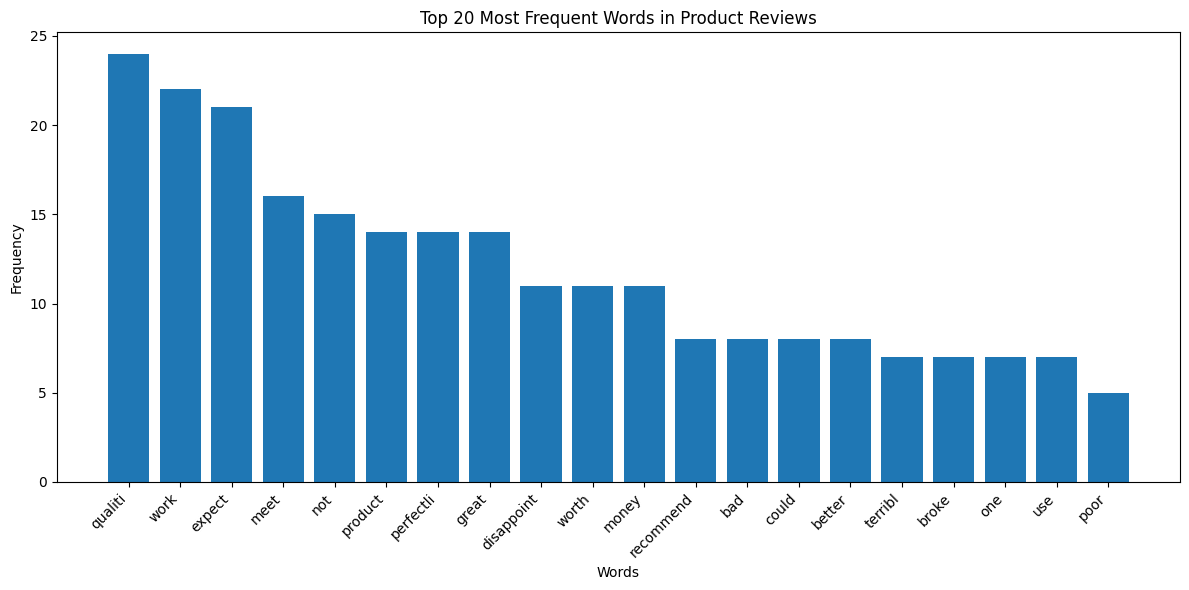

In [23]:
# Prepare data for plotting
words, counts = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Product Reviews")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


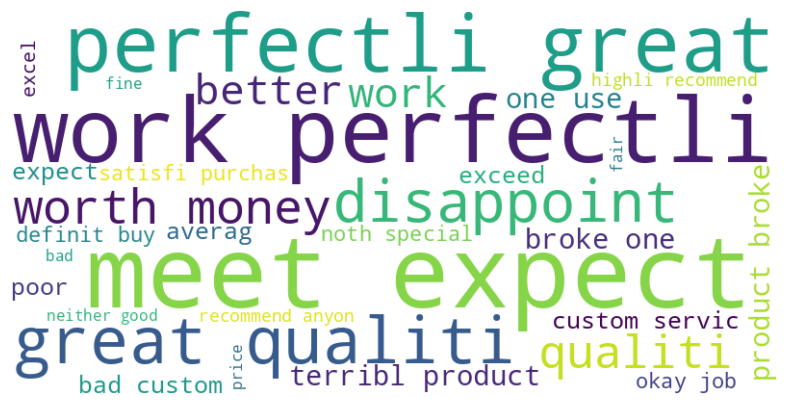

In [24]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Turn off axis numbers and ticks
plt.show()

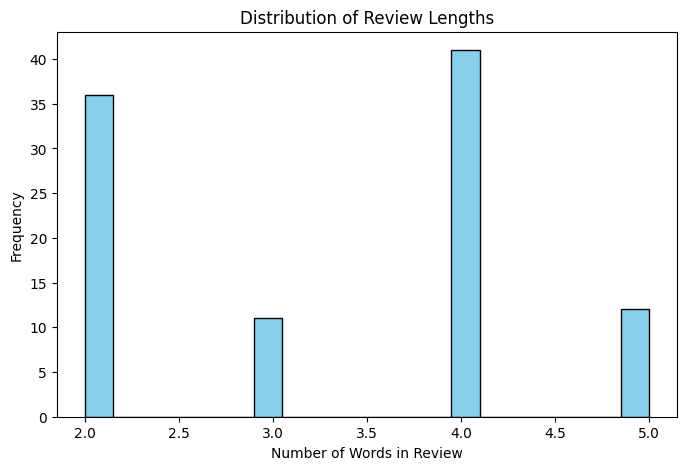

In [25]:
# Calculate the number of words in each cleaned review
review_lengths = [len(review.split()) for review in corpus]

# Create a histogram of review lengths
plt.figure(figsize=(8, 5))
plt.hist(review_lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()